# Decision Tree Classification on Iris Dataset

This notebook applies a Decision Tree classifier to the Iris dataset to predict the species of iris flowers based on sepal and petal measurements. The notebook covers data loading, exploration, preprocessing, model training, evaluation, and visualization.


In [ ]:
pip install pydotplus

In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Decision tree and evaluation
import pydotplus
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

## Load the Iris Dataset

Load the dataset from a CSV file, and display the first few rows to understand the data.


In [ ]:
data = pd.read_csv('iris.csv')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Dataset Overview

The dataset contains 150 samples with 5 columns: sepal length, sepal width, petal length, petal width, and species (the target class to predict).


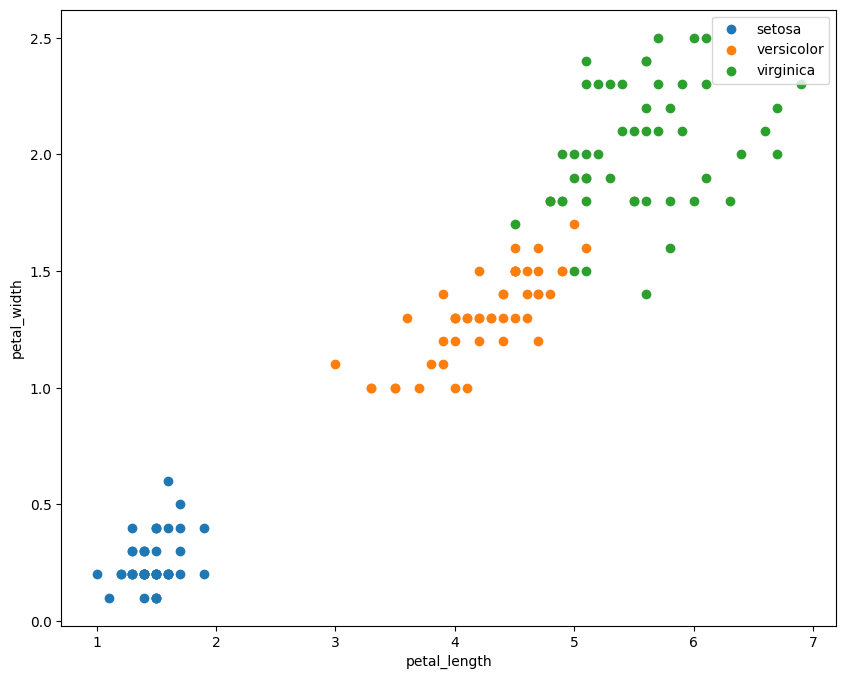

In [ ]:
plt.figure(figsize=(10,8))
for species, species_data in data.groupby('species'):
  plt.scatter(species_data['petal_length'],species_data['petal_width'],label=species)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()


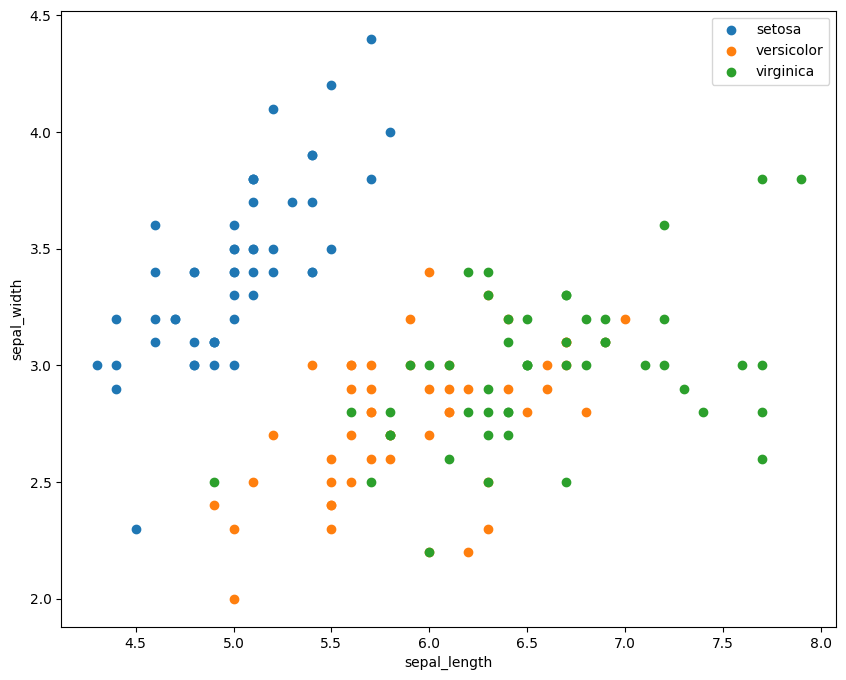

In [ ]:
plt.figure(figsize=(10,8))
for species, species_data in data.groupby('species'):
  plt.scatter(species_data['sepal_length'],species_data['sepal_width'],label=species)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()


In [ ]:
x=data.drop('species',axis=1)
y=data['species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)


In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dot_data = export_graphviz(clf, out_file=None,feature_names=x.columns,class_names=y.unique(),filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)

graph.write_png("iris_tree.png")

True

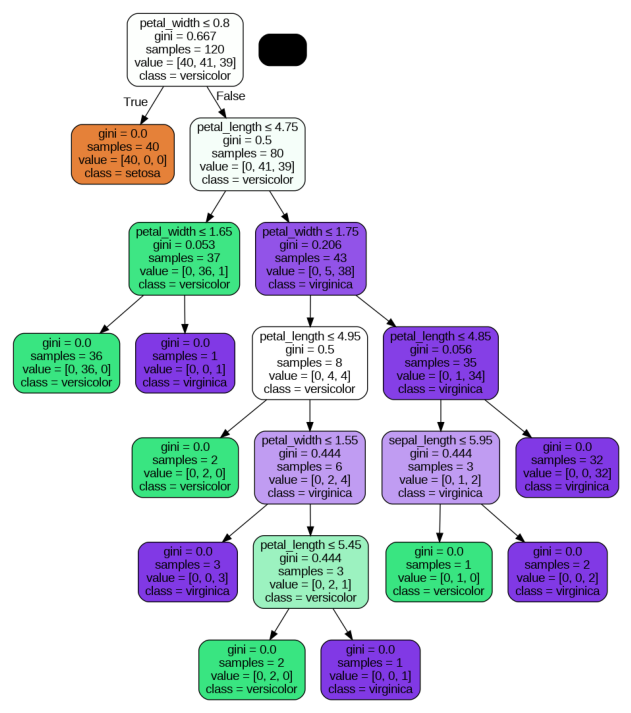

In [ ]:
plt.figure(figsize=(15,9))
plt.imshow(plt.imread("iris_tree.png"))
plt.axis('off')
plt.show()

In [ ]:
clf2=DecisionTreeClassifier(criterion="entropy")
clf2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dot_data = export_graphviz(clf2, out_file=None,feature_names=x.columns,class_names=y.unique(),filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)

graph.write_png("iris_tree2.png")

True

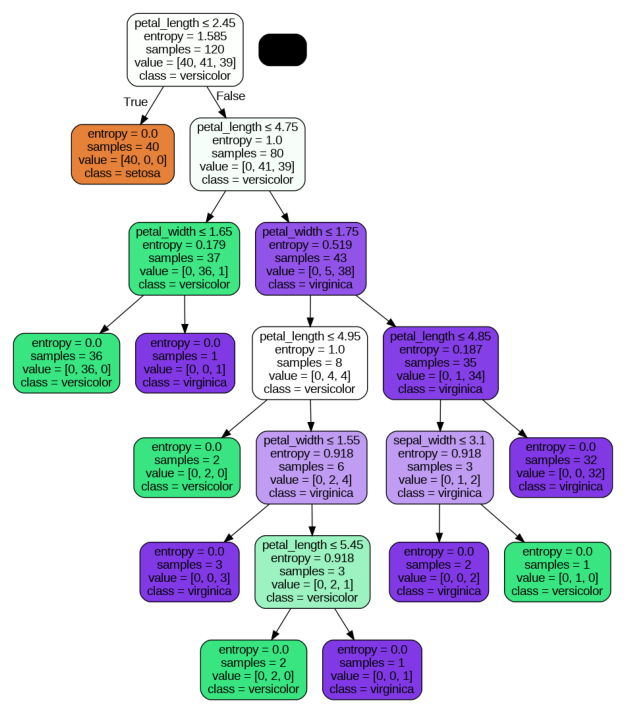

In [ ]:
plt.figure(figsize=(15,9))
plt.imshow(plt.imread("iris_tree2.png"))
plt.axis('off')
plt.show()

In [ ]:
clf3=DecisionTreeClassifier(criterion="log_loss")
clf3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

In [ ]:
dot_data = export_graphviz(clf3, out_file=None,feature_names=x.columns,class_names=y.unique(),filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)

graph.write_png("iris_tree3.png")

True

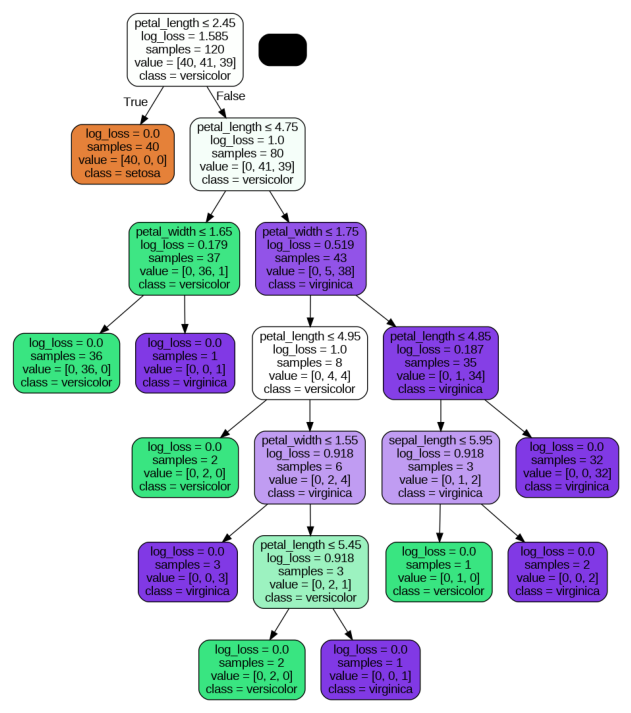

In [ ]:
plt.figure(figsize=(15,9))
plt.imshow(plt.imread("iris_tree3.png"))
plt.axis('off')
plt.show()

In [ ]:
y_pred_clf=clf.predict(x_test)
y_pred_clf2=clf2.predict(x_test)
y_pred_clf3=clf3.predict(x_test)

In [ ]:
accuracy_clf=accuracy_score(y_test,y_pred_clf)
accuracy_clf2=accuracy_score(y_test,y_pred_clf2)
accuracy_clf3=accuracy_score(y_test,y_pred_clf3)

print("Accuracy with criterion=gini",accuracy_clf)
print("Accuracy with criterion=entropy",accuracy_clf2)
print("Accuracy with criterion=log_loss",accuracy_clf3)

Accuracy with criterion=gini 1.0
Accuracy with criterion=entropy 1.0
Accuracy with criterion=log_loss 1.0


In [ ]:
from sklearn import metrics

In [ ]:
precision_clf=metrics.precision_score(y_test,y_pred_clf,average='weighted')
precision_clf2=metrics.precision_score(y_test,y_pred_clf2,average='weighted')
precision_clf3=metrics.precision_score(y_test,y_pred_clf3,average='weighted')

print("precisionwith criterion=gini",precision_clf)
print("precision with criterion=entropy",precision_clf2)
print("precision with criterion=log_loss",precision_clf3)

precisionwith criterion=gini 1.0
precision with criterion=entropy 1.0
precision with criterion=log_loss 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_y_pred=rf_clf.predict(x_test)

In [ ]:
rf_accuracy= accuracy_score(y_test,rf_y_pred)
print("Random Forest accuracy: ",rf_accuracy)

Random Forest accuracy:  1.0


In [ ]:
rf_precision= metrics.precision_score(y_test,rf_y_pred,average='weighted')
print("Random Forest precision: ",rf_precision)

Random Forest precision:  1.0


In [ ]:
rf_recall = metrics.recall_score(y_test,rf_y_pred,average='weighted')
print('Random Forest Recall',rf_recall)

Random Forest Recall 1.0


In [ ]:
rf_F1_score= metrics.f1_score(y_test,rf_y_pred,average='weighted')
print('Random Forest F1 Score',rf_F1_score)

Random Forest F1 Score 1.0


In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
gb_y_pred=gb_clf.predict(x_test)

In [ ]:
gb_accuracy= accuracy_score(y_test,gb_y_pred)
print("Gradient Boosting accuracy score: ",gb_accuracy)
gb_precision= metrics.precision_score(y_test,gb_y_pred,average='weighted')
print("Gradient Boosting precision score: ",gb_precision)
gb_recall = metrics.recall_score(y_test,gb_y_pred,average='weighted')
print('Gradient Boosting recall score: ',gb_recall)
gb_F1_score= metrics.f1_score(y_test,gb_y_pred,average='weighted')
print('Gradient Boosting f1 score score:',gb_F1_score)

Gradient Boosting accuracy score:  1.0
Gradient Boosting precision score:  1.0
Gradient Boosting recall score:  1.0
Gradient Boosting f1 score score: 1.0


## Conclusion

The decision tree classifier performs well on the Iris dataset, achieving high classification accuracy. Confusion matrix visualization helps to analyze class-wise predictions.

## Future Work

- Tune decision tree hyperparameters to improve performance
- Compare with other classifiers such as logistic regression, SVM, or random forests
- Cross-validation for better model evaluation
- Feature importance analysis and pruning the tree
